In [0]:
!unzip noisy5.zip
!unzip noisy15.zip
!unzip noisy10.zip
!unzip noisy25.zip
!unzip noisy35.zip
!unzip noisy50.zip
!unzip original.zip
!unzip original_png.zip
!unzip noisy.zip

In [0]:
import os
X = []
y = []
base_dir = '/content/noisy/'
for f in sorted(os.listdir(base_dir)):
    if os.path.isdir(base_dir+f):
        print(1)
        print(f"{f} is a target class")
        for i in sorted(os.listdir(base_dir+f)):
              print(f"{i} is an input image path")
              X.append(base_dir+f+'/'+i)
    y.append(base_dir+f)
X_t=[]
y_t=[]
base_dir = '/content/original/'
for f in sorted(os.listdir(base_dir)):
    if os.path.isdir(base_dir+f):
        print(f"{f} is a target class")
        for i in sorted(os.listdir(base_dir+f)):
              print(f"{i} is an input image path")
              X_t.append(base_dir+f+'/'+i)
    y_t.append(base_dir+f)


In [0]:
z=[]
z_t=[]

In [0]:
from matplotlib import pyplot as ttt
from matplotlib import image as mpimg

In [0]:
for i in range(len(y)):
    img=mpimg.imread(y[i])
    z.append(img)

In [0]:
for i in range(len(y_t)):
    img=mpimg.imread(y_t[i])
    z_t.append(img)

In [0]:
import cv2

In [0]:
import os

X = []
y = []
base_dir = '/content/noisy5/'
for f in sorted(os.listdir(base_dir)):
    if os.path.isdir(base_dir+f):
        print(1)
        print(f"{f} is a target class")
        for i in sorted(os.listdir(base_dir+f)):
              print(f"{i} is an input image path")
              X.append(base_dir+f+'/'+i)
    y.append(base_dir+f)
print(y)
X_t=[]
y_t=[]
base_dir = '/content/original_png/'
for f in sorted(os.listdir(base_dir)):
    if os.path.isdir(base_dir+f):
        print(f"{f} is a target class")
        for i in sorted(os.listdir(base_dir+f)):
              print(f"{i} is an input image path")
              X_t.append(base_dir+f+'/'+i)
    y_t.append(base_dir+f)
print(y_t)


['/content/noisy5/0000.png', '/content/noisy5/0001.png', '/content/noisy5/0002.png', '/content/noisy5/0003.png', '/content/noisy5/0004.png', '/content/noisy5/0005.png', '/content/noisy5/0006.png', '/content/noisy5/0007.png', '/content/noisy5/0008.png', '/content/noisy5/0009.png', '/content/noisy5/0010.png', '/content/noisy5/0011.png', '/content/noisy5/0012.png', '/content/noisy5/0013.png', '/content/noisy5/0014.png', '/content/noisy5/0015.png', '/content/noisy5/0016.png', '/content/noisy5/0017.png', '/content/noisy5/0018.png', '/content/noisy5/0019.png', '/content/noisy5/0020.png', '/content/noisy5/0021.png', '/content/noisy5/0022.png', '/content/noisy5/0023.png', '/content/noisy5/0024.png', '/content/noisy5/0025.png', '/content/noisy5/0026.png', '/content/noisy5/0027.png', '/content/noisy5/0028.png', '/content/noisy5/0029.png', '/content/noisy5/0030.png', '/content/noisy5/0031.png', '/content/noisy5/0032.png', '/content/noisy5/0033.png', '/content/noisy5/0034.png', '/content/noisy5/00

In [0]:
for i in range(len(y)):
    img=mpimg.imread(y[i])
    res = cv2.resize(img, dsize=(180, 180), interpolation=cv2.INTER_CUBIC)
    z.append(res)

In [0]:
for i in range(len(y_t)):
    img=mpimg.imread(y_t[i])
    res = cv2.resize(img, dsize=(180, 180), interpolation=cv2.INTER_CUBIC)
    z_t.append(res)

In [0]:
 from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(z, z_t, test_size=0.09, random_state=42)

In [0]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
kerasBKED = os.environ["KERAS_BACKEND"] 
print(kerasBKED)

tensorflow


In [0]:
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import os
import pickle
import numpy as np

In [0]:
X_train1=np.array(X_train)


In [0]:
X_test1=np.array(X_test)

In [0]:
y_train1=np.array(y_train)
y_test1=np.array(y_test)

In [0]:
print('x_train shape:', X_train1.shape)
print(X_train1.shape[0], 'train samples')
print(X_test1.shape[0], 'test samples')

x_train shape: (735, 180, 180, 3)
735 train samples
73 test samples


In [0]:
def showOrigDec(orig, noise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(orig[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display noisy
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(noise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [0]:
input_img = Input(shape=(180, 180, 3))
x = Conv2D(64, (3, 3), padding='same')(input_img)
x = Activation('relu')(x)

for i in range(10):
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

x = Conv2D(3, (3, 3), padding='same')(x)
decoded = Activation('tanh')(x)

In [0]:
model = Model(input_img,decoded)
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
batch_size = 32

epochs = 10

In [0]:
history = model.fit(X_train1, y_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test1, y_test1),
                    shuffle=True)

Train on 735 samples, validate on 73 samples
Epoch 1/10
735/735 [==============================] - 2009s 3s/step - loss: 0.1007 - val_loss: 0.2209
Epoch 2/10
735/735 [==============================] - 1963s 3s/step - loss: 0.0194 - val_loss: 0.1100
Epoch 3/10
735/735 [==============================] - 1950s 3s/step - loss: 0.0128 - val_loss: 0.0482
Epoch 4/10
735/735 [==============================] - 1962s 3s/step - loss: 0.0105 - val_loss: 0.0196
Epoch 5/10
735/735 [==============================] - 1962s 3s/step - loss: 0.0090 - val_loss: 0.0136
Epoch 6/10
735/735 [==============================] - 1974s 3s/step - loss: 0.0091 - val_loss: 0.0121
Epoch 7/10
735/735 [==============================] - 1971s 3s/step - loss: 0.0087 - val_loss: 0.0116
Epoch 8/10
735/735 [==============================] - 1987s 3s/step - loss: 0.0084 - val_loss: 0.0096
Epoch 9/10
735/735 [==============================] - 1992s 3s/step - loss: 0.0070 - val_loss: 0.0108
Epoch 10/10
735/735 [================

In [0]:
def showOrigDec(orig, noise, denoise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 6))

    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i+1)
        plt.imshow(orig[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display nisy image
        ax = plt.subplot(3, n, i +1 + n)
        plt.imshow(noise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display denoised image
        ax = plt.subplot(3, n, i +1 + n + n)
        plt.imshow(denoise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [0]:
s8=model.predict(X_test1)

W0627 23:57:28.362835 140004469340032 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0627 23:57:28.379203 140004469340032 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0627 23:57:28.393705 140004469340032 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0627 23:57:28.463989 140004469340032 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0627 23:57:28.501394 140004469340032 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0627 23:57:28.519770 140004469340032 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0627 23:57:28.534511 140004

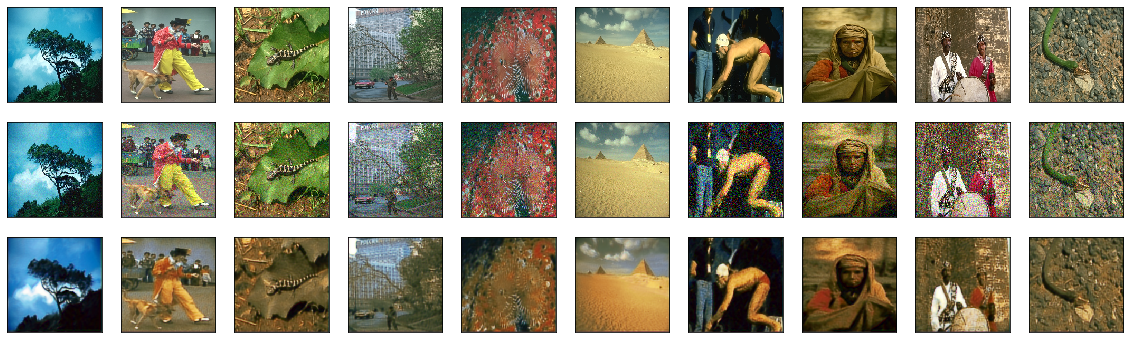

In [0]:
showOrigDec(y_test1,X_test1,s8)

In [0]:
X_train2=model.predict(X_train1)

In [0]:
input_img = Input(shape=(180, 180, 3))
x = Conv2D(64, (3, 3), padding='same')(input_img)
x = Activation('relu')(x)

for i in range(10):
  if(i==3):
    x=MaxPooling2D((2, 2), padding='same')(x)
  if(i==8):
    x=UpSampling2D((2, 2))(x)
  x = Conv2D(64, (3, 3), padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

x = Conv2D(3, (3, 3), padding='same')(x)
decodedD = Activation('tanh')(x)

In [0]:
model1 = Model(input_img,decodedD)
model1.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
historych = model1.fit(X_train2, y_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(s8, y_test1),
                    shuffle=True)

Train on 735 samples, validate on 73 samples
Epoch 1/10
735/735 [==============================] - 1314s 2s/step - loss: 0.0541 - val_loss: 0.1660
Epoch 2/10
735/735 [==============================] - 1305s 2s/step - loss: 0.0158 - val_loss: 0.0523
Epoch 3/10
735/735 [==============================] - 1306s 2s/step - loss: 0.0137 - val_loss: 0.0161
Epoch 4/10
735/735 [==============================] - 1308s 2s/step - loss: 0.0118 - val_loss: 0.0128
Epoch 5/10
735/735 [==============================] - 1306s 2s/step - loss: 0.0101 - val_loss: 0.0107
Epoch 6/10
735/735 [==============================] - 1300s 2s/step - loss: 0.0106 - val_loss: 0.0112
Epoch 7/10
735/735 [==============================] - 1301s 2s/step - loss: 0.0099 - val_loss: 0.0113
Epoch 8/10
735/735 [==============================] - 1302s 2s/step - loss: 0.0092 - val_loss: 0.0089
Epoch 9/10
735/735 [==============================] - 1301s 2s/step - loss: 0.0092 - val_loss: 0.0082
Epoch 10/10
735/735 [================

In [0]:
def showOrigDec(orig, noise, denoise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 6))

    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i+1)
        plt.imshow(orig[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display nisy image
        ax = plt.subplot(3, n, i +1 + n)
        plt.imshow(noise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display denoised image
        ax = plt.subplot(3, n, i +1 + n + n)
        plt.imshow(denoise[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [0]:
s82=model1.predict(s8)

W0628 04:47:14.956242 140004469340032 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0628 04:47:14.984865 140004469340032 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0628 04:47:15.001334 140004469340032 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0628 04:47:15.042152 140004469340032 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0628 04:47:15.069970 140004469340032 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0628 04:47:15.086165 140004469340032 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0628 04:47:15.115647 140004

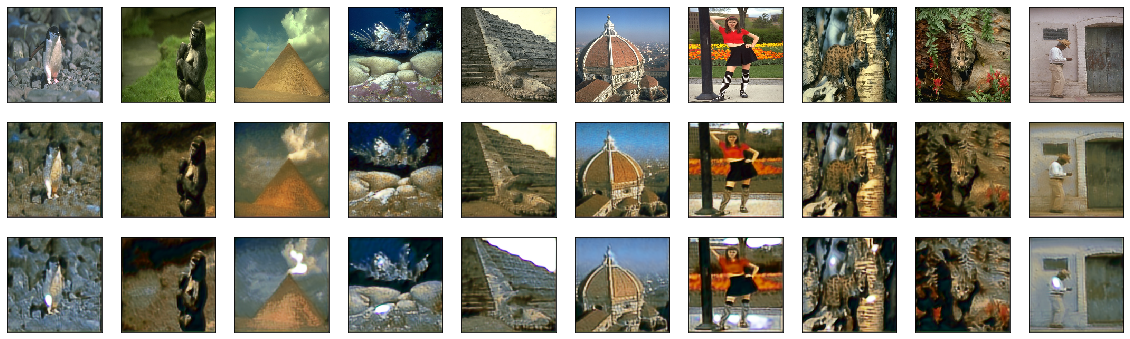

In [0]:
showOrigDec(y_test1[20:],s8[20:],s82[20:])

In [0]:
import numpy 
import math
import cv2
def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
      return 100
    PIXEL_MAX = 1.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))
sum=0
for i in range(73):
    original=y_test1[26]
    contrast =s82[26]
    d=psnr(original,contrast)
    sum+=d
print(sum/73)

17.005579843446203


In [0]:
import numpy 
import math
import cv2

def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
      return 100
    PIXEL_MAX = 1.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))
sum=0
for i in range(73):
    original=y_test1[26]
    contrast =s8[26]
    d=psnr(original,contrast)
    sum+=d
print(sum/73)

18.233954064315633


In [1]:
import numpy 
import math
import cv2

def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
      return 100
    PIXEL_MAX = 1.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))
sum=0
for i in range(73):
    original=y_test1[26]
    contrast =X_test1[26]
    d=psnr(original,contrast)
    sum+=d
print(sum/73)

NameError: ignored